# Introduction to Reinforcement Learning (RL)
Author: Bill Zheng (bill[dot]cy[dot]zheng[at]berkeley.edu)

In this notebook, you will understand what is reinforcement learning, how to formulate a reinforcement learning problem, and how to work with openAI's gym interface for reinforcement learning tasks.

## With reinforcement learning, you can "teach" an AI to run complex tasks such as playing Atari games and walk!

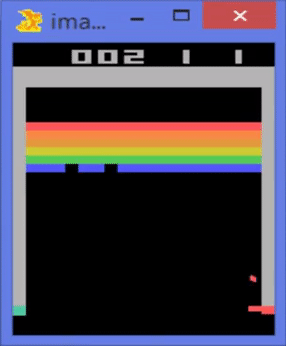



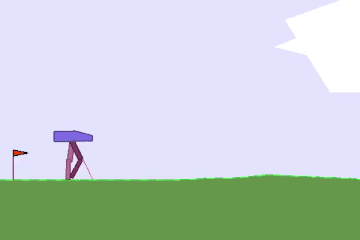

Source: Google Deepmind for Atari, [alirezamika's repository](https://github.com/alirezamika/bipedal-es) for bipedal walk

# "Prerequisites" in this tutorial

This notebook is designed to be as intuitive as possible, given the need for the introduction of RL to everyone. However, some fundamentals are assumed for the users to be familiar with, which include a good understanding conditional probability and optimization, as well as basics for understanding and implementing deep learning algorithms in PyTorch. If you are not familiar with them, don't worry! This is designed to be a comprehensive tutorial, and I sincerely hope you can pick things up along the way. If something is not clear and I didn't specify it, Google and Stack Overflow (mayyyybe a bit of ChatGPT*) is a good place to search for answers. I hope you're here for a good time!

*Author's note: I don't really like ChatGPT -- it rarely gives correct answers especially when answering lengthy analytical questions and it sounds really confident when doing so. Use it more as a starter in your own train of thoughts though, as that will be very helpful!

# What is Reinforcement Learning?

<i>If I were to describe RL in one sentence, it would be the set of algorithms that helps an agent to find the optimal behavior within a system. </i>

The core idea of reinforcement learning came from game-playing, an essential aspect of statistics and economics: given that we have a system dynamics, what is the optimal way for us to find the optimal behavior within this system? Although this concept has been explored widely in different fields, computer scientists discovered that this mechanism allowed the development of algorithms that can use this for more complicated tasks. Simply speaking, any system where the agent can act and receive a reward based on its actions can be classified as a reinforcement learning environment, and the objective of this agent is always <b>to maximize its reward</b>.

In a sense (borrowed from control theory), one can consider reinforcement learning as a sort of feedback control*, where an agent adjusts its behavior to accomodate for the environment around it in order to maximize its reward.

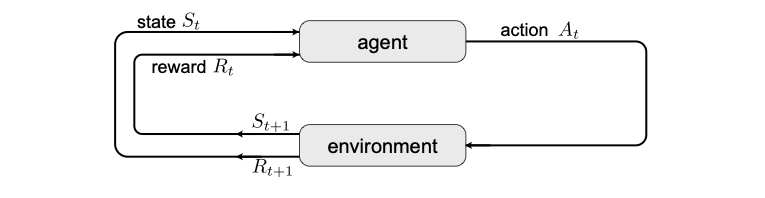

[Image Source](https://ml-lectures.org/docs/reinforcement_learning/ml_reinforcement-learning-2.html)

*: A big caveat is that while some of the RL algorithms have parallels with closed-loop control, which is what is deemed optimal in the field of control theory, it is not always the case, as some RL algorithms are analogous to open-loop control.

## Formulating RL Environments

### State Space

With the high-level goal in mind, we can now formulate a system for RL agents. We would start something called a Markov Decision Process (MDP), where we assume one of the most important properties of RL -- that previous actions do not influence the actions in a later state (also known as Markovian Property). We would then implement a system of state that would describe the dynamic system at hand. To achieve this, we first borrow the idea of states from Markov chains, giving our agents a domain that it can be in. We denote the set of states as $S$, and unlike Markov chains, we can designate $S$ to be anything, as long as it <b>adequately describes the set of states an agent can be in</b>.

#### An Example: Pac-Man

Let's look at Pac-Man, one of the classics in terms of teaching AIs how to play games. Below is a picture of the game play, and we can formulate the state space together:

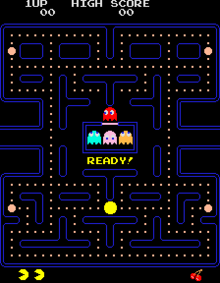

Image source: Wikipedia

Our first chain of thought is to capture both the Pac-Man's position as well as the ghosts' positions in our state space, but that doesn't seem to be enough: there are still information missing.

Well, we can certainly add more -- we can distinguish whether the ghosts are scared or not, how long they are scared until, Pac-Man's number of lives, and for each dot, whether the Pac-Man has eaten it or not! And once the Pac-Man has either eaten all of the points or have run out of its lives, the game terminates.

With that in mind, we can then combine everything together, and write out the state space for Pac-Man:

$S = \text{Concat}[(position)_\text{Pac-Man}, (position)_\text{ghosts 1-4}, \text{List of dots and whether they have been eaten or not}, \text{Whether the ghosts are scared}, live_\text{Pac-Man}]$

As for the rest, we can use computers to make sure they are properly formatted.

### State Transition Probabilities

Going back to the ideas in Markov chains, we would want some sort of transition model between different states that is (hopefully) influenced by the agent's actions. Next we have the state transition function, where there are 2 possible ways to formulate it: in the case where the environment itself is discrete, we have a probability function $P:S×A×S→[0,1]$, which means that it takes in a starting state within 𝑆, an action within 𝐴, and an ending state within 𝑆 and outputs a value from 0 to 1 that represents the probability of transitioning to the out state given the input state and action.

In the case where the environment is continuous, we would instead use the probability density function (PDF), denoted as $L:S×A×S→ℝ^+$, and such PDF follows the rules defined for any arbitrary PDF.

Going back to Pac-Man, the transition function in this case seems redundant: if the agent presses left, then Pac-Man will go to the square in the left on the next turn, if it is allowed to do so. However, this is not the case at all! Even though we can control the actions of the Pac-Man, we cannot control the action of ghosts, and since there is a stochastic event in each transition, then there are many different transitions available, and the next states will have different outcomes.

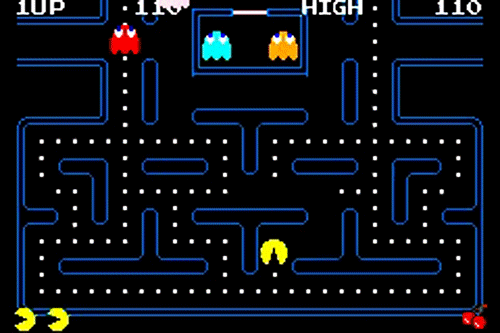

[Gif Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fblog.lootcrate.com%2Fgif-crate-pac-man-fever%2F&psig=AOvVaw1WB82lP4TUQF_bnhrxl_se&ust=1691140922386000&source=images&cd=vfe&opi=89978449&ved=0CA0QjRxqFwoTCLi39YaVwIADFQAAAAAdAAAAABAD)

As we can see, the ghost agents are not following a deterministic policy, and for that we need state transition functions in RL problems in many cases to account for the noise within the system, even in a simple setup such as Pac-Man.

### Rewards & Discount Factor

Now we have states and transitions, we can now go to the part of rewards. Generally rewards are dictated by the previous state, the current state, and the action that the agent took; however some problem setting have the reward to only depend on the previous state and the action. We will use the first convention, and define rewards function $r$ as $r:S×A×S→ℝ$. We can see that the rewards function just like the transition probabilities in some sense, and instead of returning a probability distribution, it always returns a number based on the agent's action and information of the states.

Finally, we must include a time deprecation (discount) constant in our RL problem, and we can define it as $γ∈(0,1)$. How this works is that if the proposed state-action-state triplet happens $i$ timesteps after the current timestep, then we will multiply the reward from that triplet by γ $i$ times. Therefore, the total reward with respect of time is calculated as

$$R = \Sigma_{i=0}^{N} γ^ir_i$$

Some of you may ask: why is there a discount factor to begin with?

The reason there is a time deprecation is twofold: first, we would like to implicitly assume that the agent would prefer short term gains compared to long-term gains to avoid overlooking any catastrophic failures. This is known as the <i>inductive bias</i> of the RL system, if you're interested in more of it, I have another post dedicated just for inductive biases in machine learning, and how it applies to the realms of computer vision as well as RL.

However, we can also see the mathematical justification of capping the reward value. Let $r_i$ denote the reward from one step, and γ is the discount factor. What can we show about this special property? Well, we can see that if there is some state-action pair that would yield the optimal reward, let's call it $r_{max}$, then we can see that the total reward we can earn is no bigger than $\frac{1}{1-γ} r_{max}$, as we can see the property of infinite series. What does this show? Well, this shows that if there is a discount factor, then the maximal amount of rewards the agent can obtain is capped at some value. Practically speaking, this helps preventing any errors regarding large numbers in floating point operations, and this helps programmers to quantitatively upper-bound the maximum rewards.

# Time to rev up OpenAI's Gym and start coding RL algorithms!

Let's spend time away from Pac-Man for a while and look for more concrete examples of control tasks within the realm of RL. In this module, you will be introduced to both creating and rendering some common control tasks with OpenAI's gym, and we can get into some fundamental algorithms in the next module!

## Install Dependencies & Importing Libraries

In [1]:
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet


from pyvirtualdisplay import Display
Display().start()

import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 15 not upgraded.
Need to get 7,812 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1

## Creating and running a gym environment

In this demonstration, we will use cartpole as an example. A cartpole environment has 2 different actions, left or right, such that the cart can slide along a frictionless track. The pole is attached on the cart, and it has no degree of freedom on it (that means the only way to control it is through the movement of the cart). The objective of the agent is to make sure that the pole does not fall over a certain threshold while the cart does not go out of bounds, and the reward is calculated based on that.

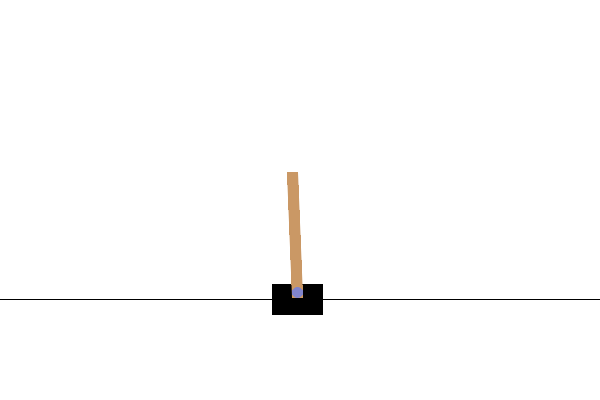

It is difficult to run gym renderings on Google Colab, but you can do it either through matplotlib or rendering the video directly. You can mix and match between these methods.

### Method 1: using xvfb/matplotlib for rendering

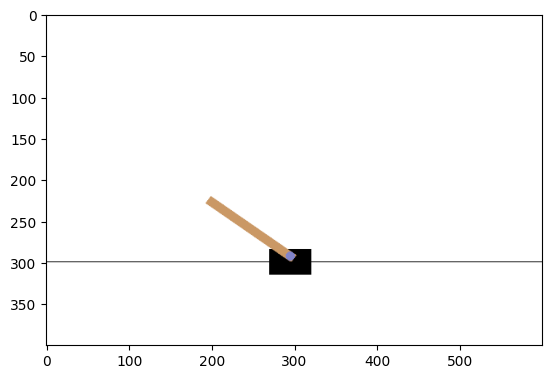

In [6]:
# Build environment

# Special thanks to https://stackoverflow.com/questions/50107530/how-to-render-openai-gym-in-google-colab
# For showing how to run this on xvfb!

env = gym.make('CartPole-v0')
env.reset() # it's necessary to call env.reset() at the beginning so that the gym library knows it's opening up a new environment.

dp = plt.imshow(env.render('rgb_array')) # only call this once

for _ in range(40):
    dp.set_data(env.render('rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample() # Here, we randomly sample action from the MDP
    env.step(action)

### Method 2: Using <i>gym.record_video</i>

Another way we can use this, albeit without real-time simulation, is to render the results into a video. This is a work in progress, and please reference [this documentation](https://gymnasium.farama.org/api/wrappers/misc_wrappers/#gymnasium.wrappers.RecordVideo) for further analysis.

## Evaluating your RL Model

Now, we know how to render a RL environment, and gym will automatically record these information for you. This code snippet can show how will the rewards change in our toy environment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

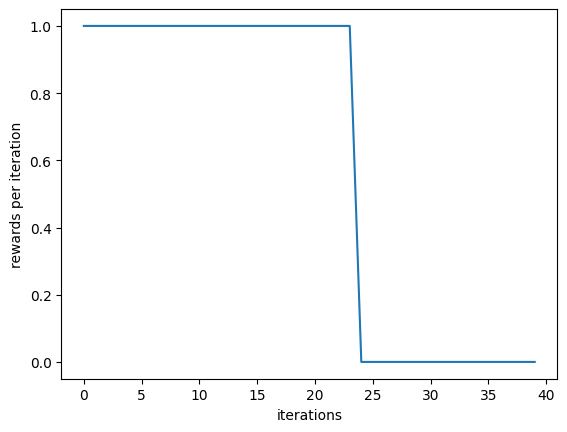

In [9]:
import numpy as np

env = gym.make('CartPole-v1')
env.reset()

it=40

rews = []
for _ in range(it):
  action = env.action_space.sample() # Here, we randomly sample action from the MDP
  observation, reward, done, info = env.step(action)
  rews.append(reward)

plt.plot(range(it), rews)
plt.xlabel("iterations")
plt.ylabel("rewards per iteration")
plt.show()


While the reward function might not be working according to the simulation (as it is simply a step function), documentation actually showed us that as long as the cartpole fits within the allowed range of motion, the reward will stay at 1. In the future we will continue working with more sophisticated RL models, so the reward function will not be as binary as the one shown here.

With that being said, this concludes our first session, where you are introduced with basic ideas in RL. In the next session, we will work on some classical RL algorithms and introduce you to deep RL. See you there!